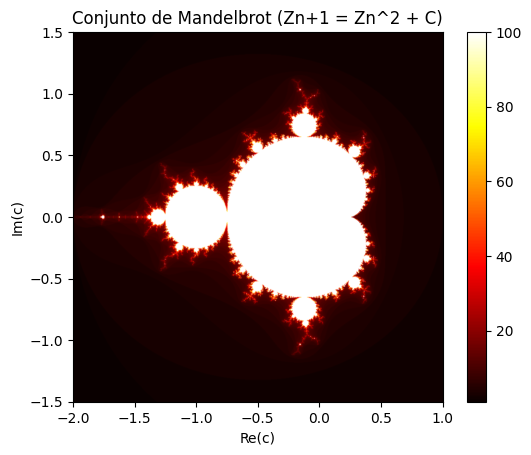

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z**2 + c  # Aquí se suma C en cada iteración
        n += 1
    return n

def mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter):
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    mandelbrot_grid = np.zeros((height, width))

    for i in range(height):
        for j in range(width):
            c = x[j] + y[i] * 1j  # Define el número complejo C
            mandelbrot_grid[i, j] = mandelbrot(c, max_iter)

    return mandelbrot_grid

def plot_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter):
    mandelbrot_grid = mandelbrot_set(width, height, x_min, x_max, y_min, y_max, max_iter)
    plt.imshow(mandelbrot_grid, extent=(x_min, x_max, y_min, y_max), cmap='hot', interpolation='bilinear')
    plt.colorbar()
    plt.title("Conjunto de Mandelbrot (Zn+1 = Zn^2 + C)")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.show()

# Parámetros para la visualización
width, height = 800, 800
x_min, x_max = -2.0, 1.0  # Rango en el eje real
y_min, y_max = -1.5, 1.5  # Rango en el eje imaginario
max_iter = 100  # Número máximo de iteraciones

# Generar y mostrar el conjunto de Mandelbrot
plot_mandelbrot(width, height, x_min, x_max, y_min, y_max, max_iter)

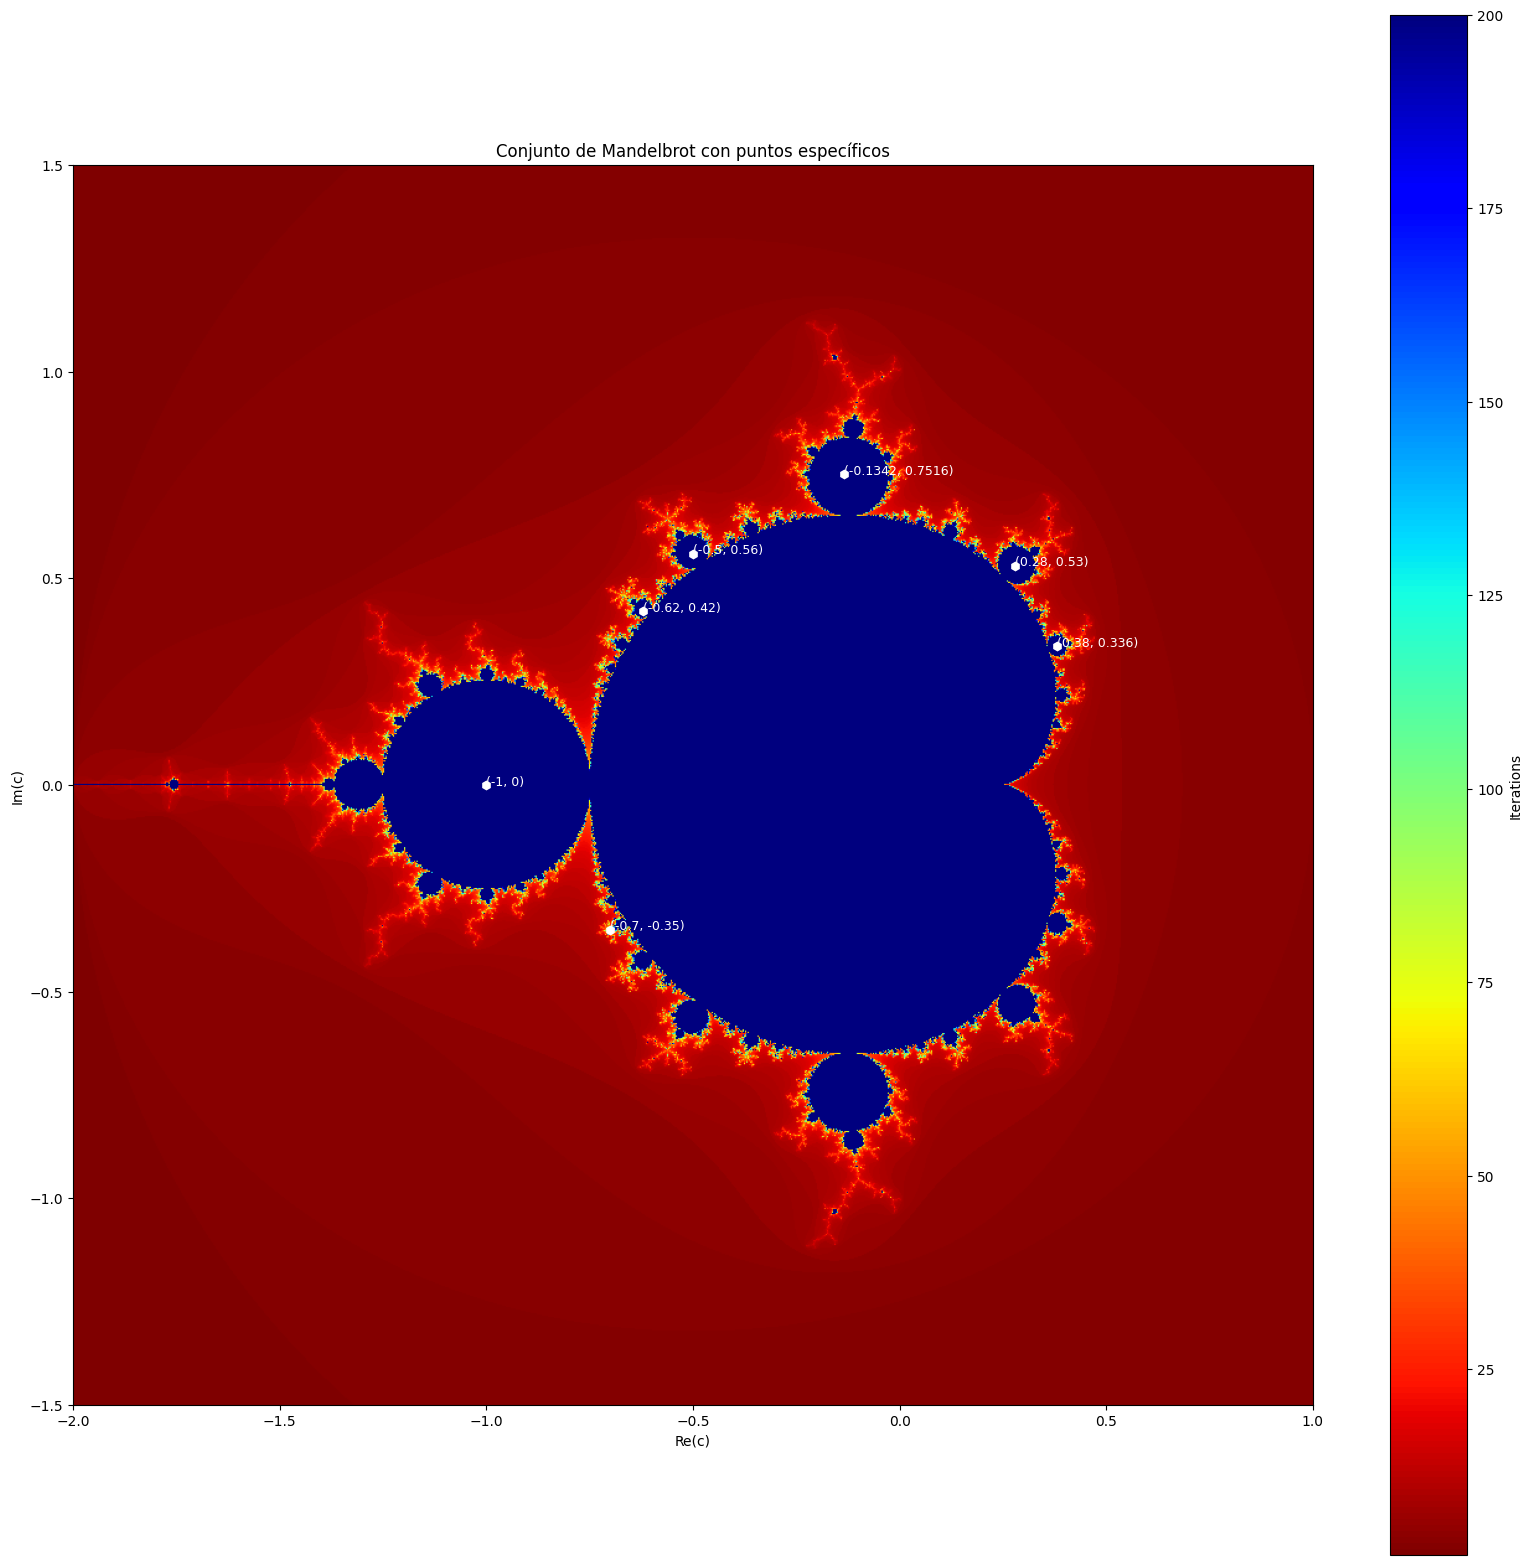

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para calcular el conjunto de Mandelbrot
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    return n

# Definir la resolución y el rango de la gráfica
width, height = 1000, 1000
x_min, x_max = -2.0, 1.0
y_min, y_max = -1.5, 1.5

# Crear una imagen vacía
image = np.zeros((height, width))

# Generar el conjunto de Mandelbrot
max_iter = 200
for row in range(height):
    for col in range(width):
        x0 = x_min + (x_max - x_min) * col / width
        y0 = y_min + (y_max - y_min) * row / height
        c = complex(x0, y0)
        m = mandelbrot(c, max_iter)
        image[row, col] = m

# Mostrar la imagen del conjunto de Mandelbrot
plt.figure(figsize=(20, 20))
plt.imshow(image, extent=(x_min, x_max, y_min, y_max), cmap='jet_r', origin='lower')
plt.colorbar(label='Iterations')

# Definir los puntos a graficar
points = [(-1, 0), (-0.1342, 0.7516), (0.28, 0.53), (-0.5, 0.56), (0.38, 0.336), (-0.62, 0.42), (-0.70, -0.35)]

# Graficar los puntos
for (x, y) in points:
    plt.plot(x, y, 'wh')  # 'bo' significa puntos azules
    plt.text(x, y, f'({x}, {y})', fontsize=9, color='white')

# Mostrar la gráfica
plt.title('Conjunto de Mandelbrot con puntos específicos')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()

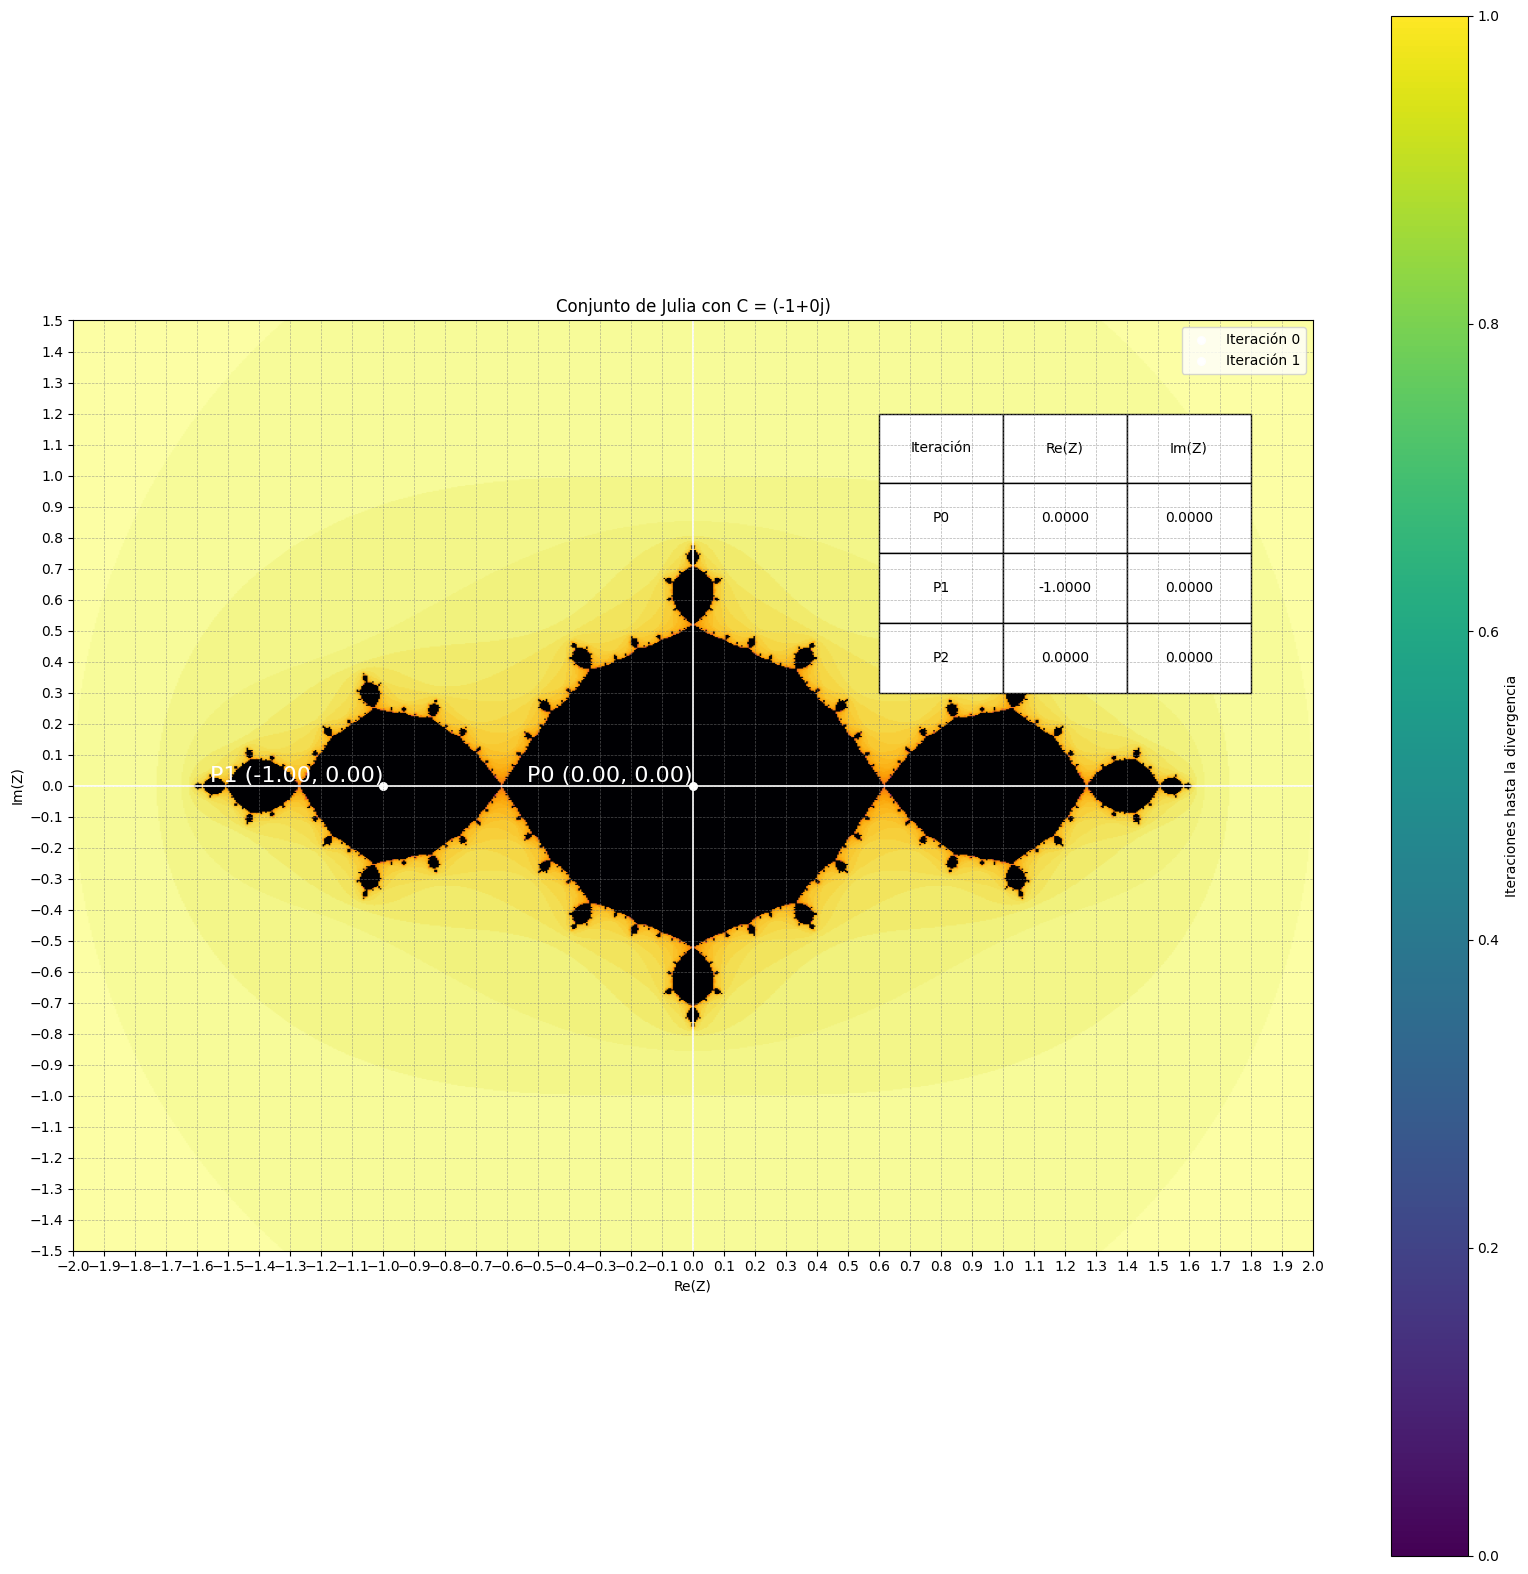

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 800, 800
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.5, 1.5
max_iter = 70  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(-1, 0)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(2):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='inferno_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

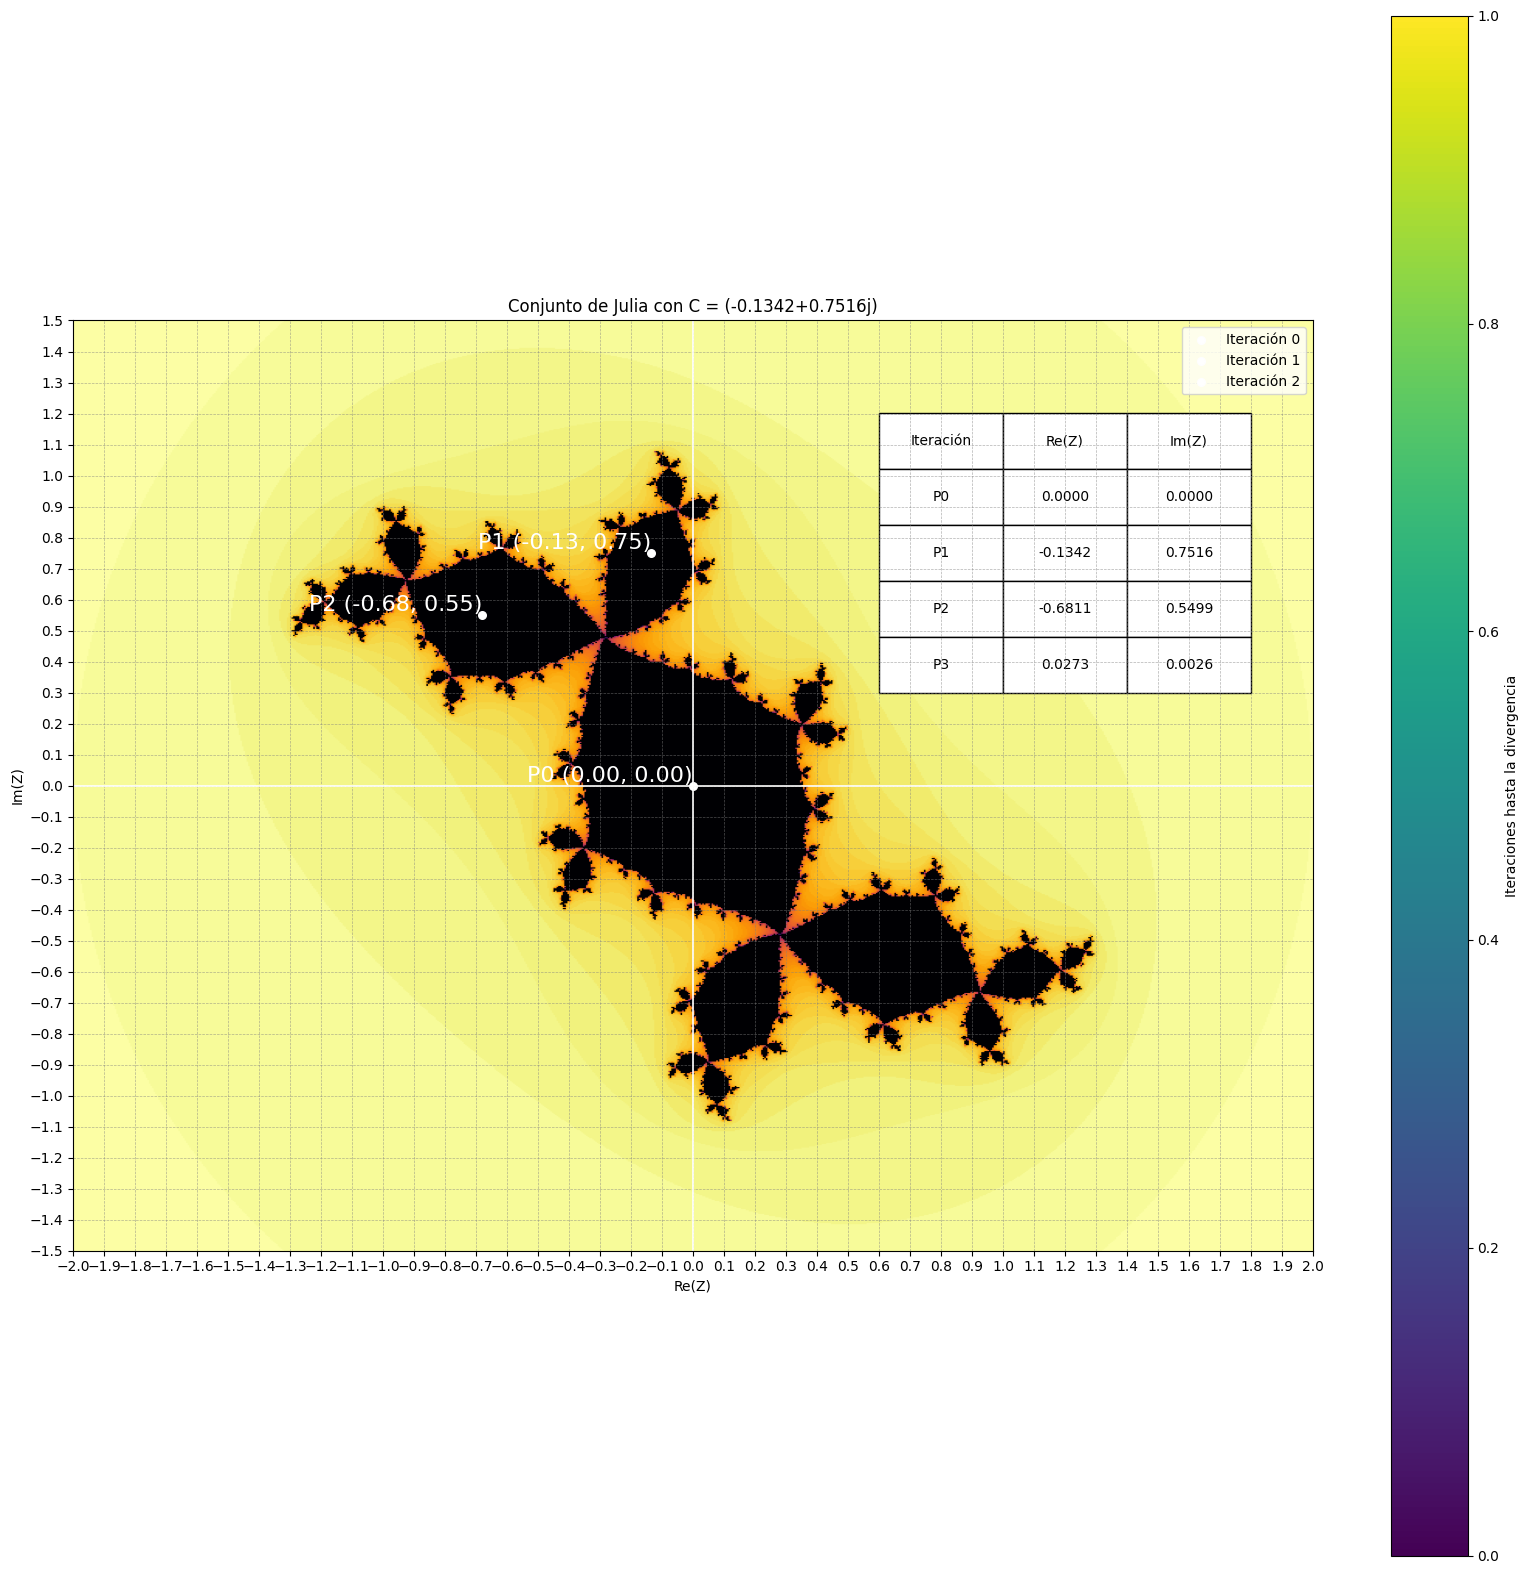

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 800, 800
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.5, 1.5
max_iter = 70  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(-0.1342, 0.7516)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(3):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='inferno_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

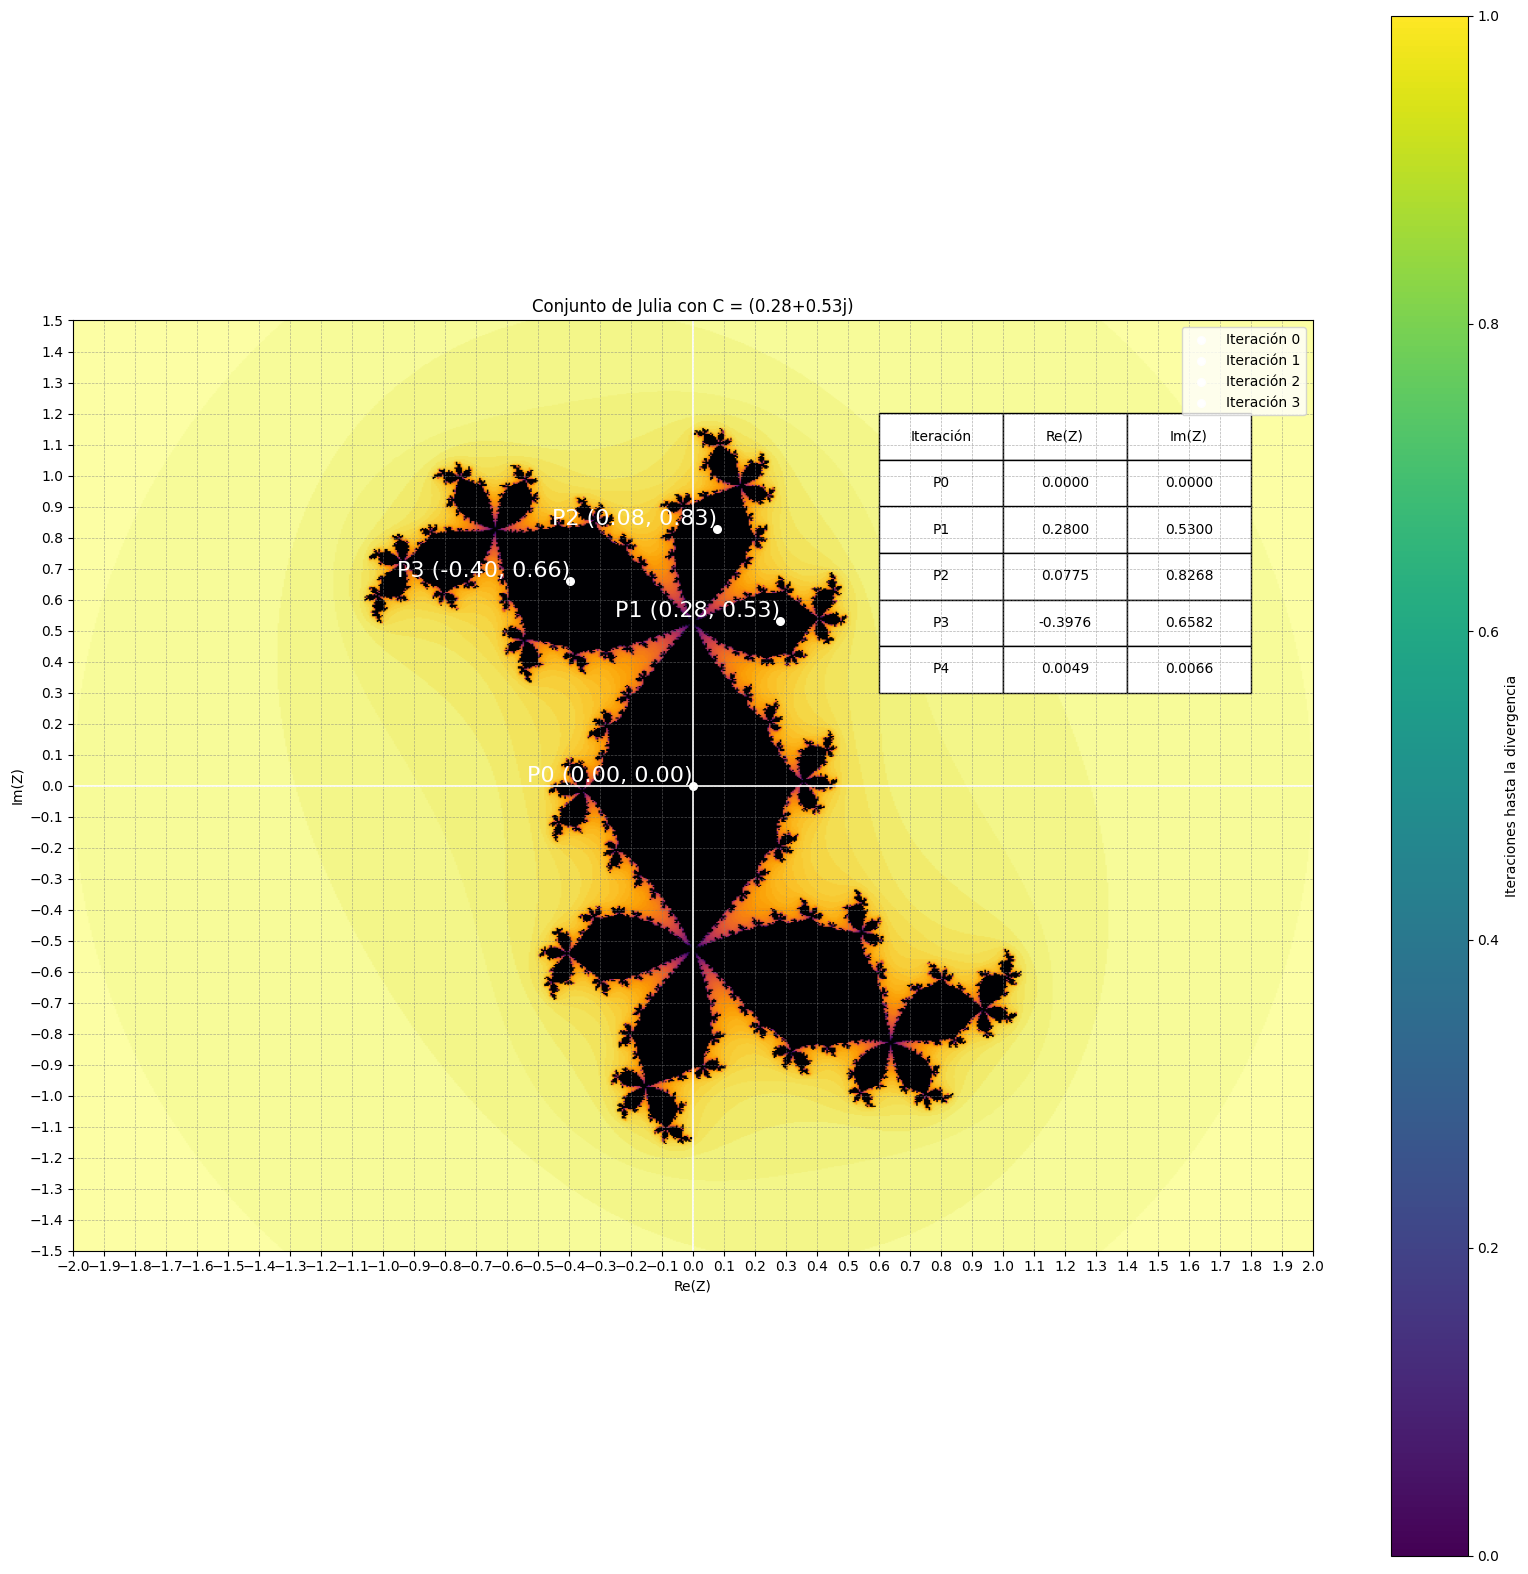

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 800, 800
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.5, 1.5
max_iter = 70  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(0.28, 0.53)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(4):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='inferno_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

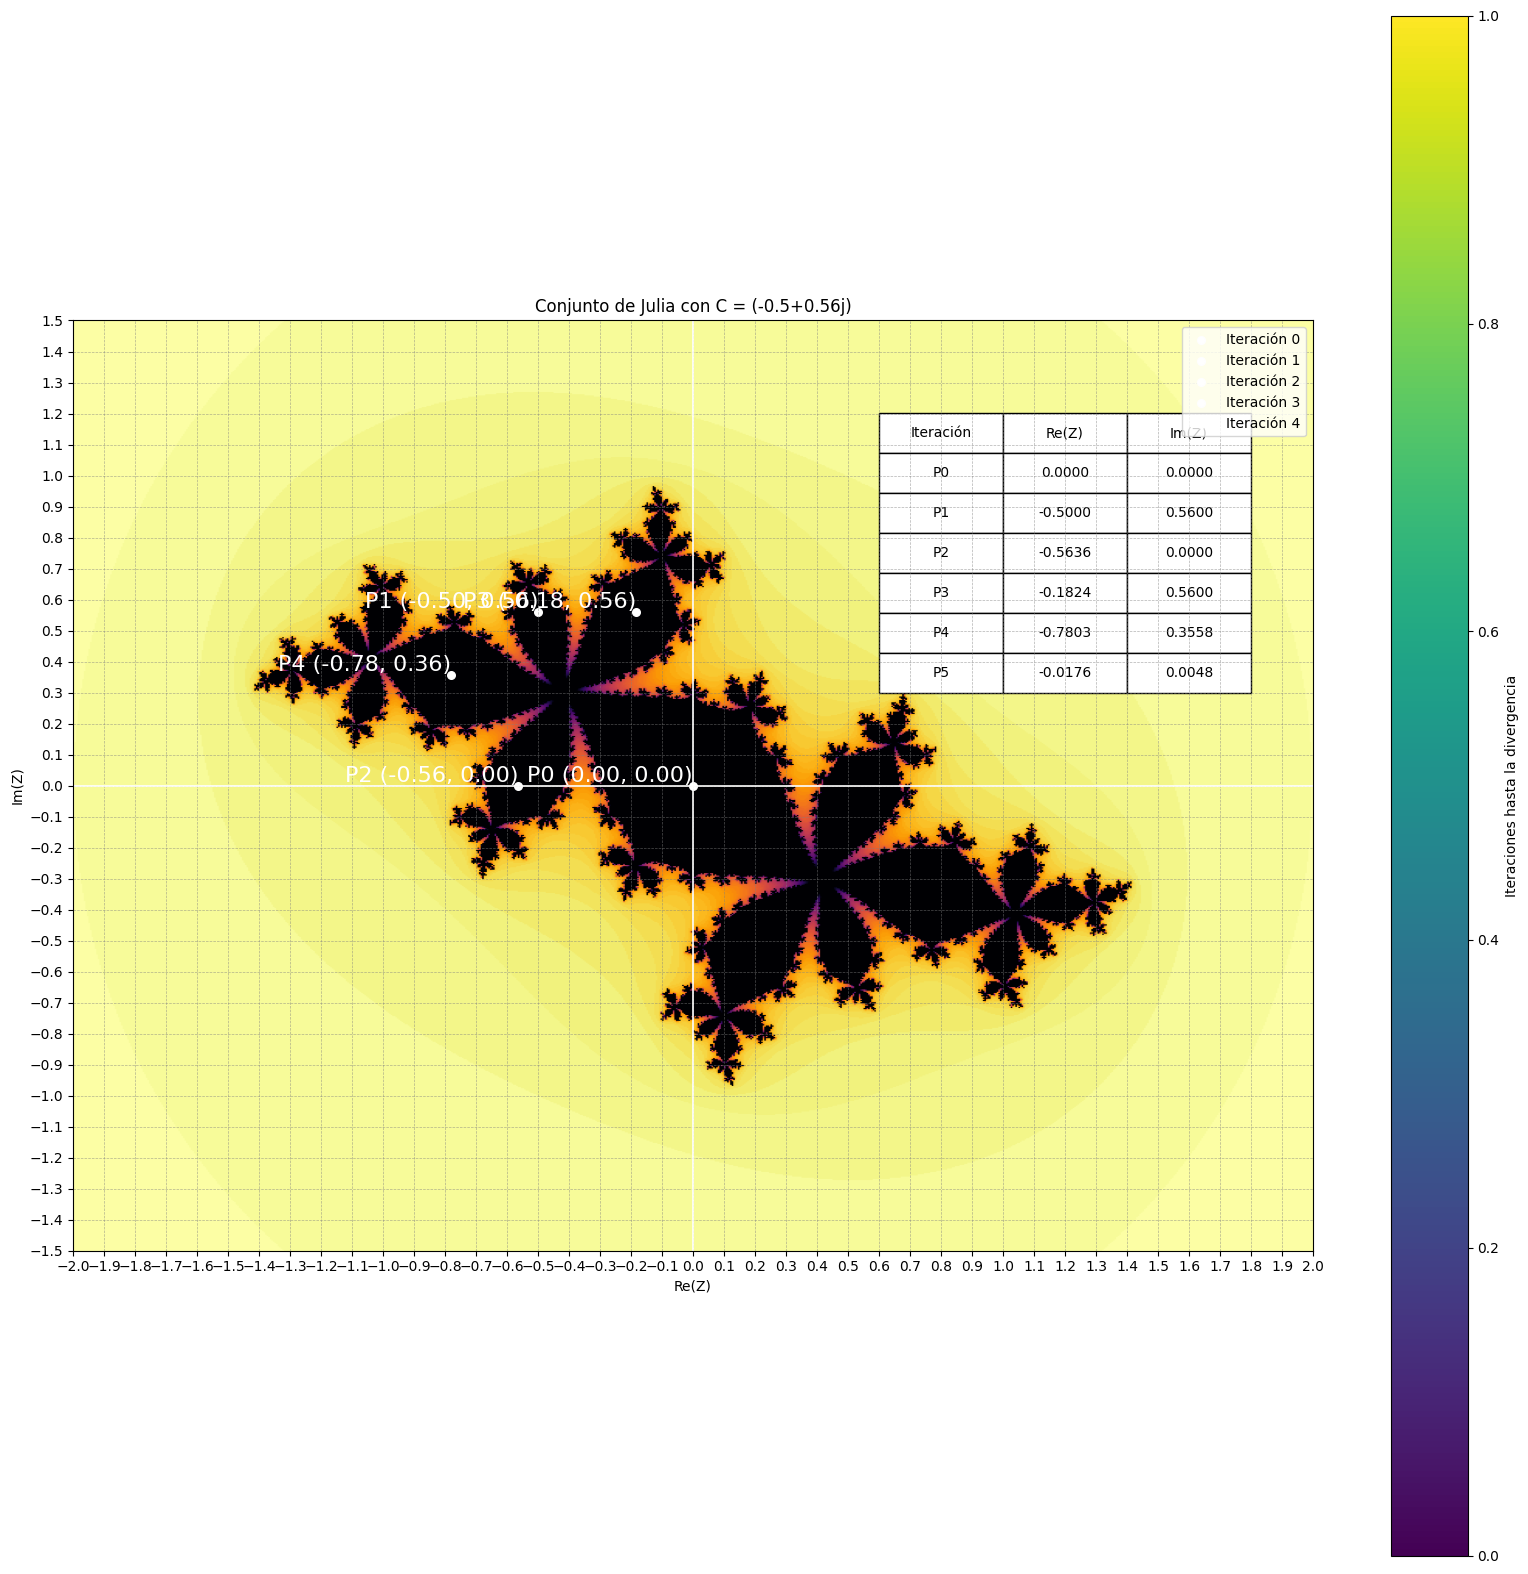

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 800, 800
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.5, 1.5
max_iter = 70  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(-0.5, 0.56)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(5):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='inferno_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

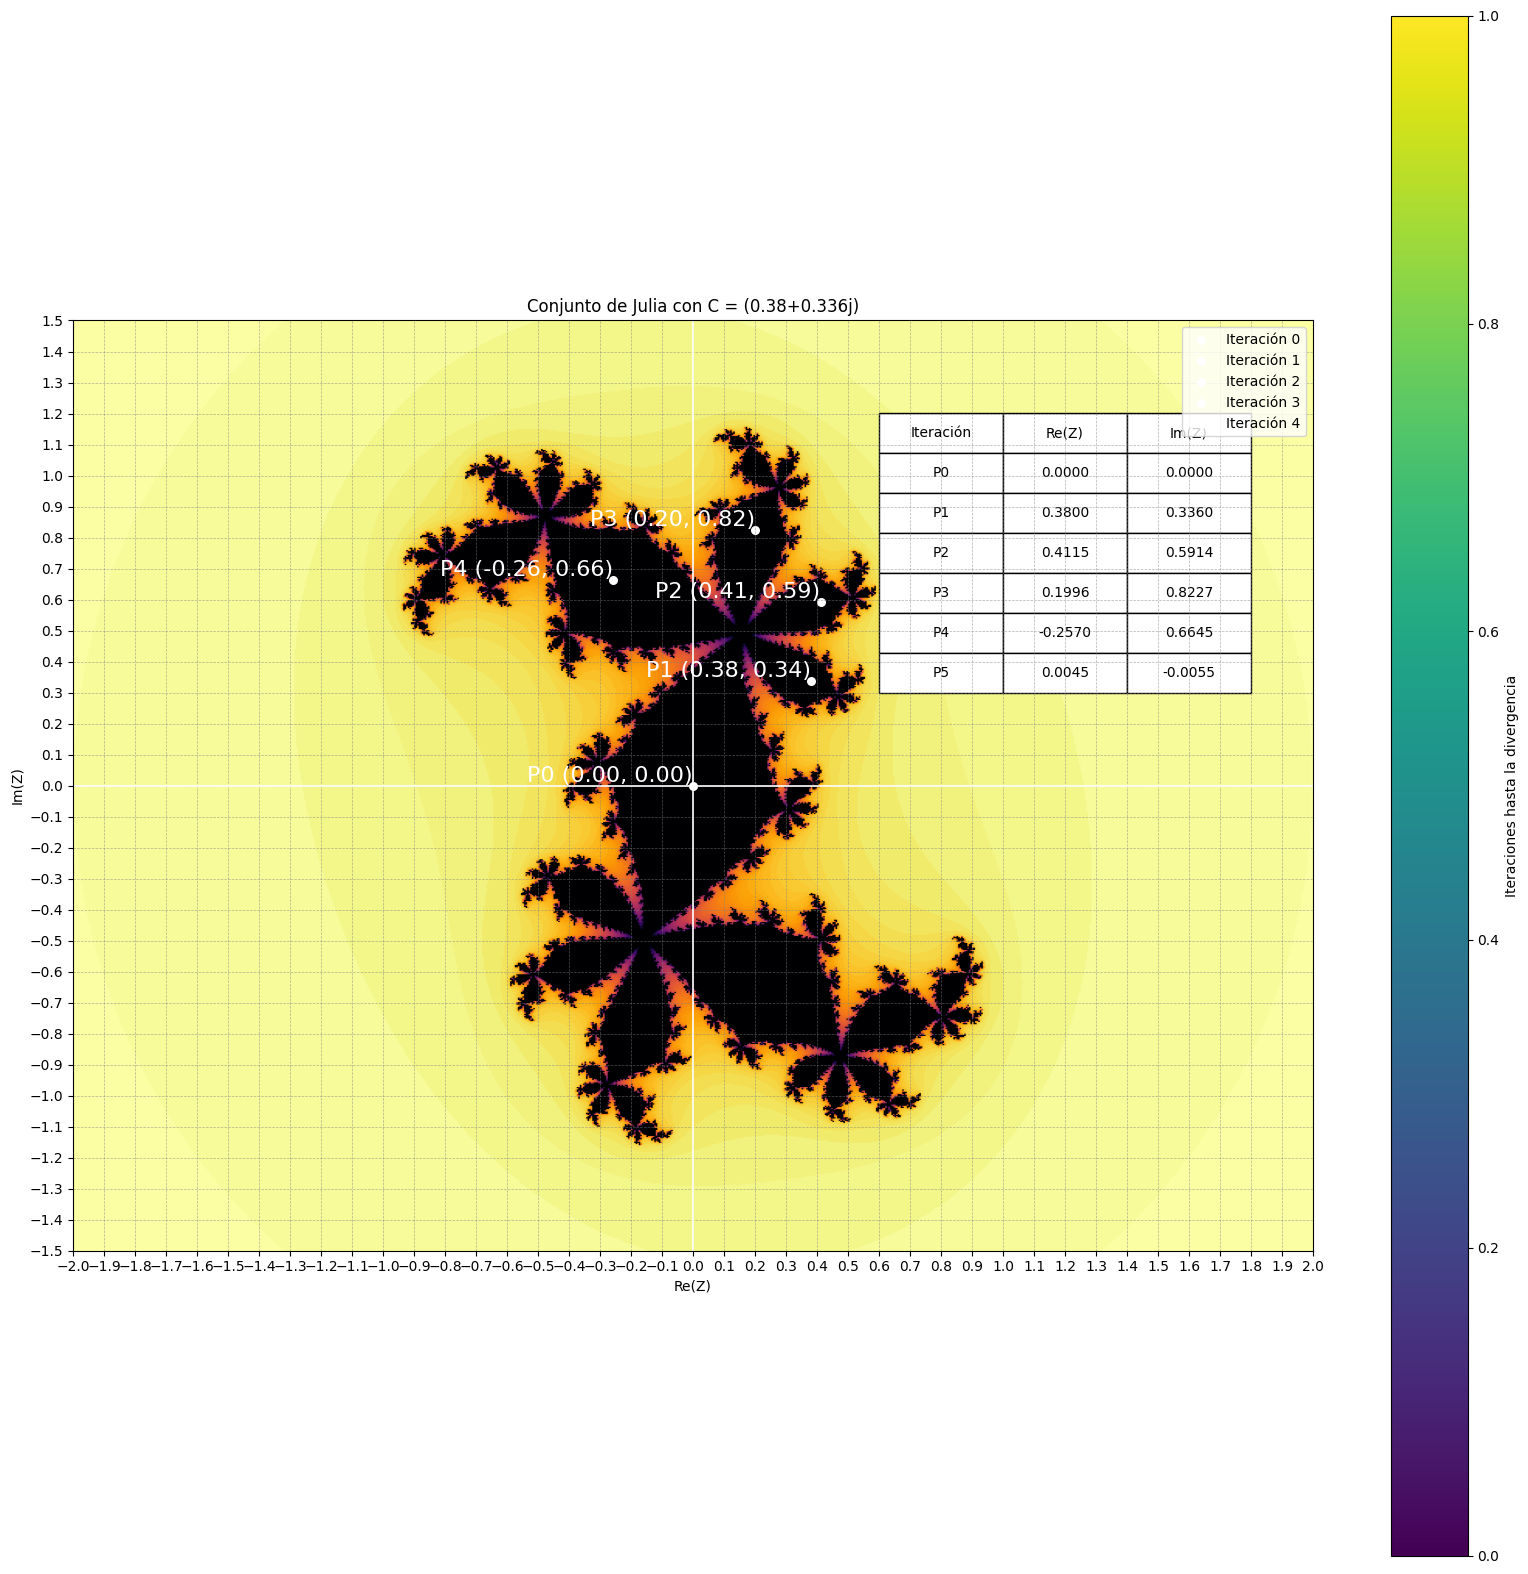

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 800, 800
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.5, 1.5
max_iter = 70  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(0.38, 0.336)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(5):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='inferno_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

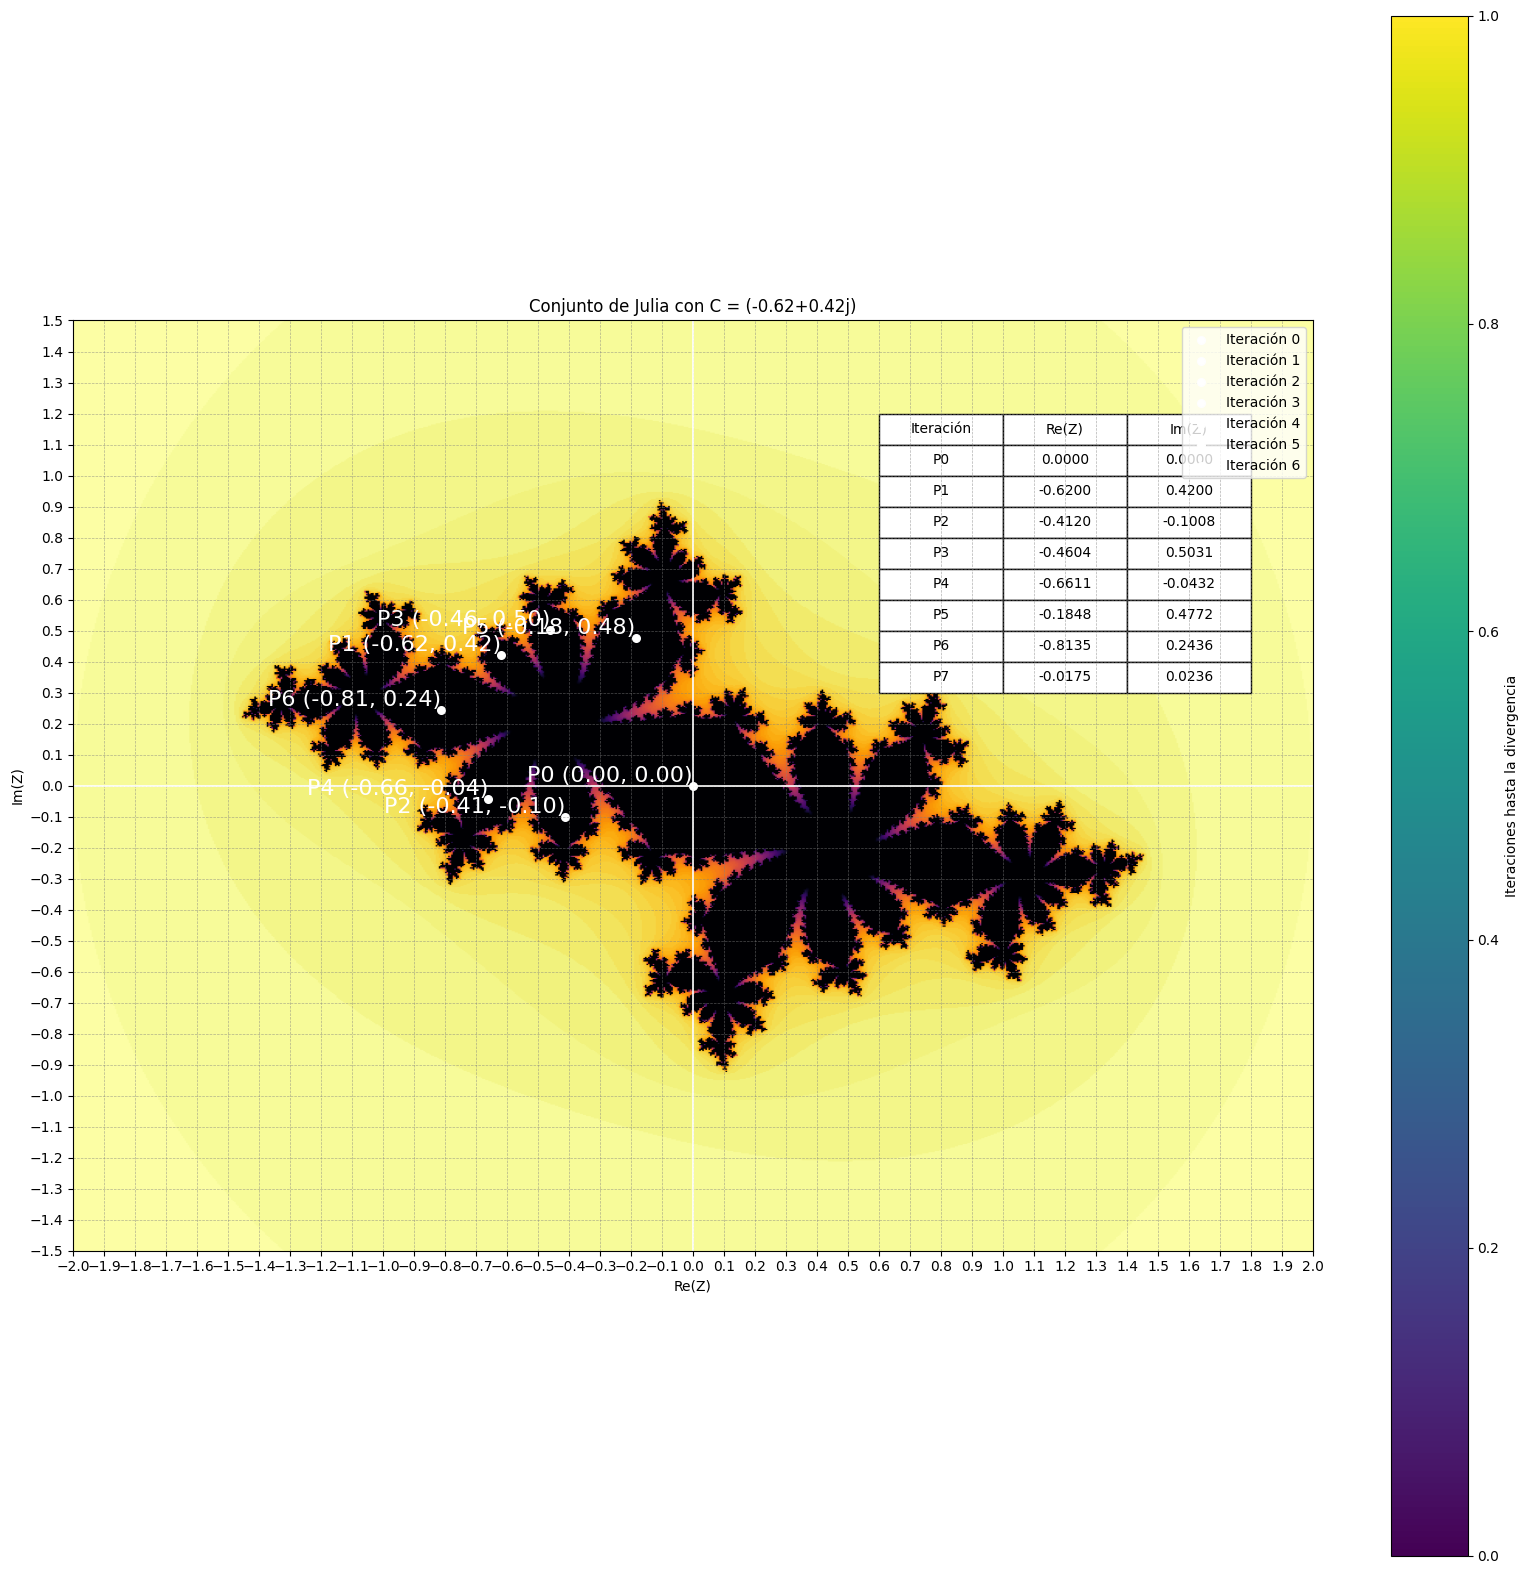

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 800, 800
x_min, x_max = -2.0, 2.0
y_min, y_max = -1.5, 1.5
max_iter = 70  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(-0.62, 0.42)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(7):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='inferno_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

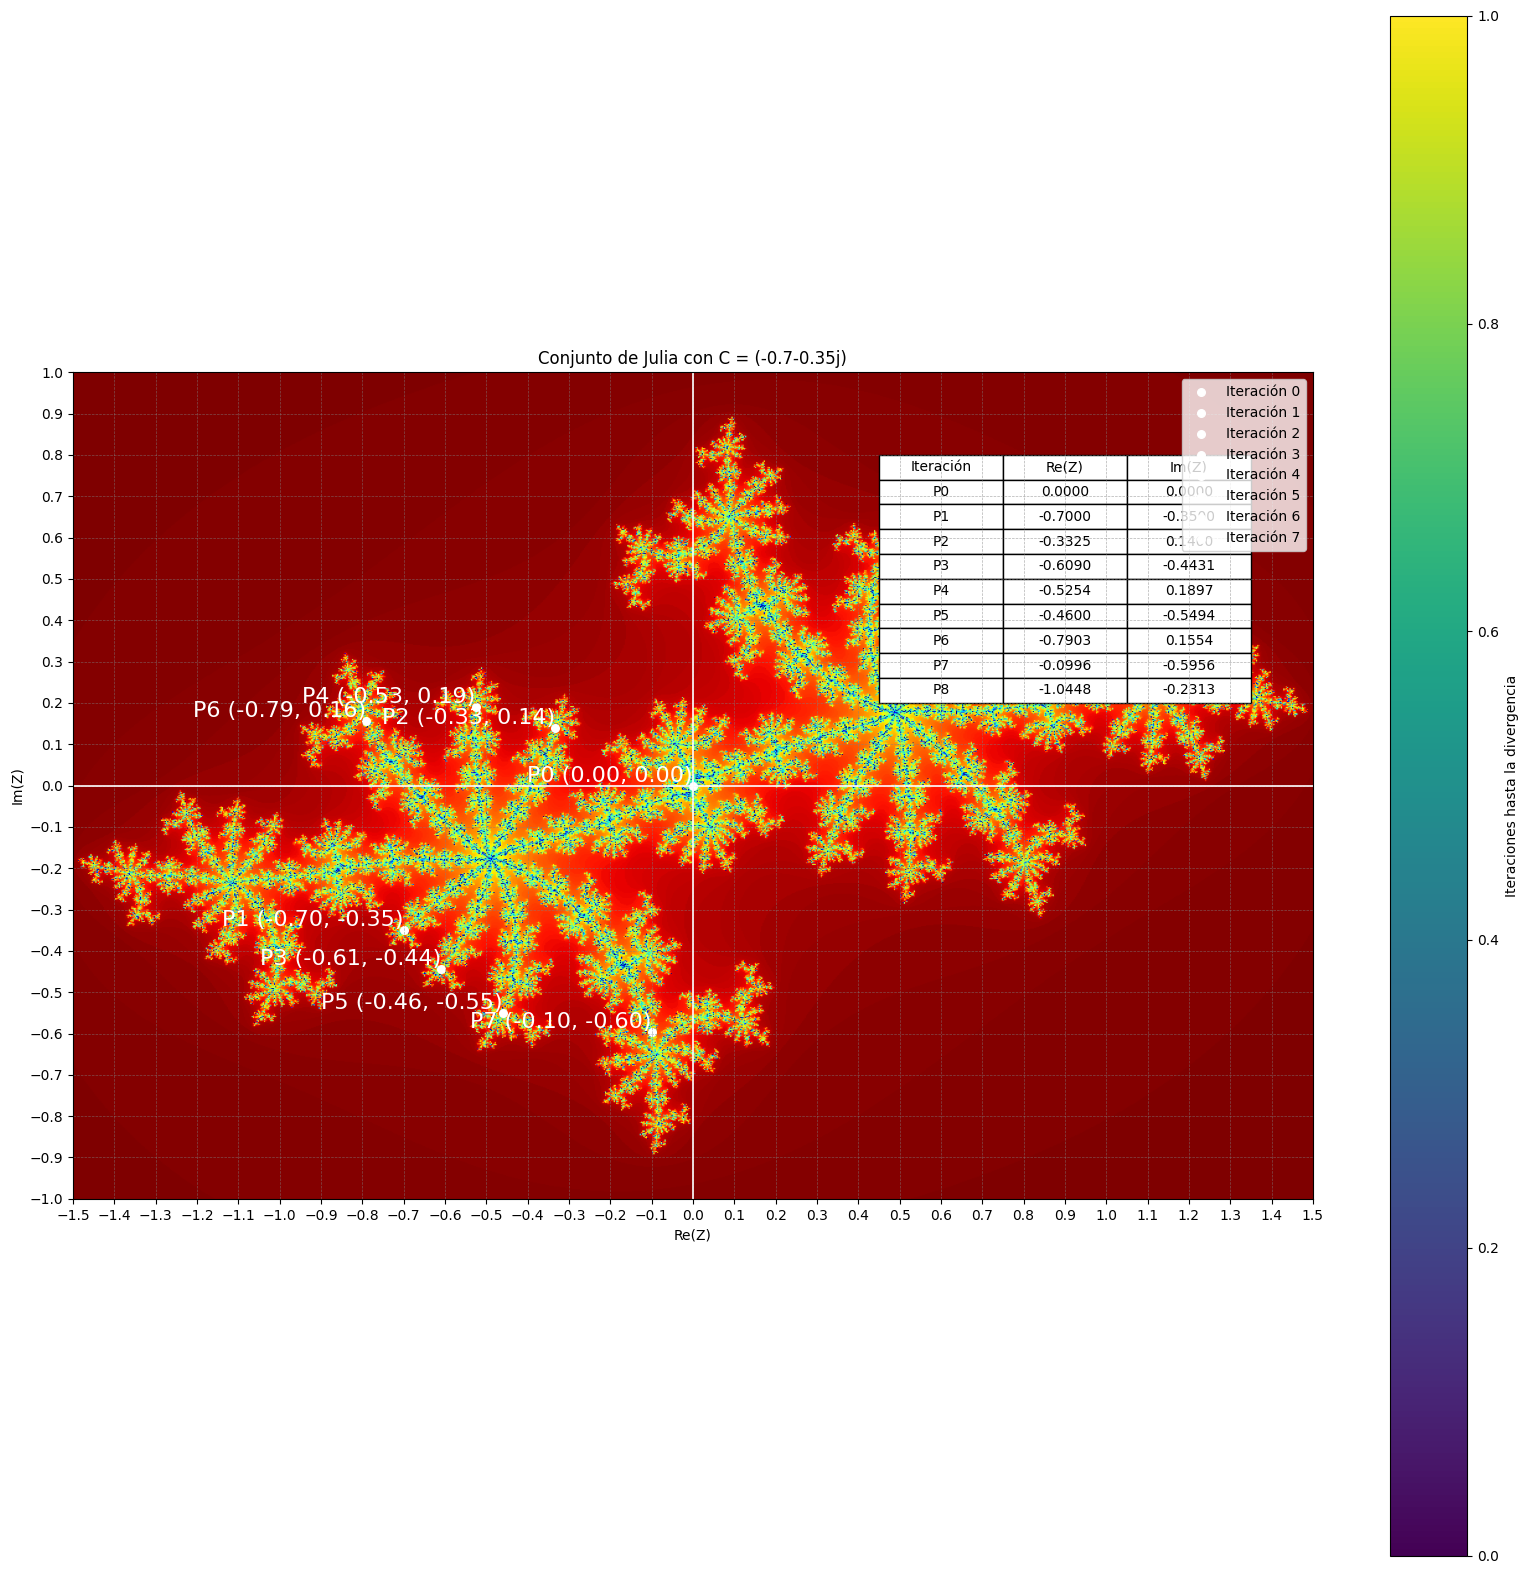

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 1000, 1000
x_min, x_max = -1.5, 1.5
y_min, y_max = -1, 1
max_iter = 200  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(-0.70, -0.35)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(8):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='jet_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

**Rango: -2.25<x<1.25 ; -1.5<y<1.5**

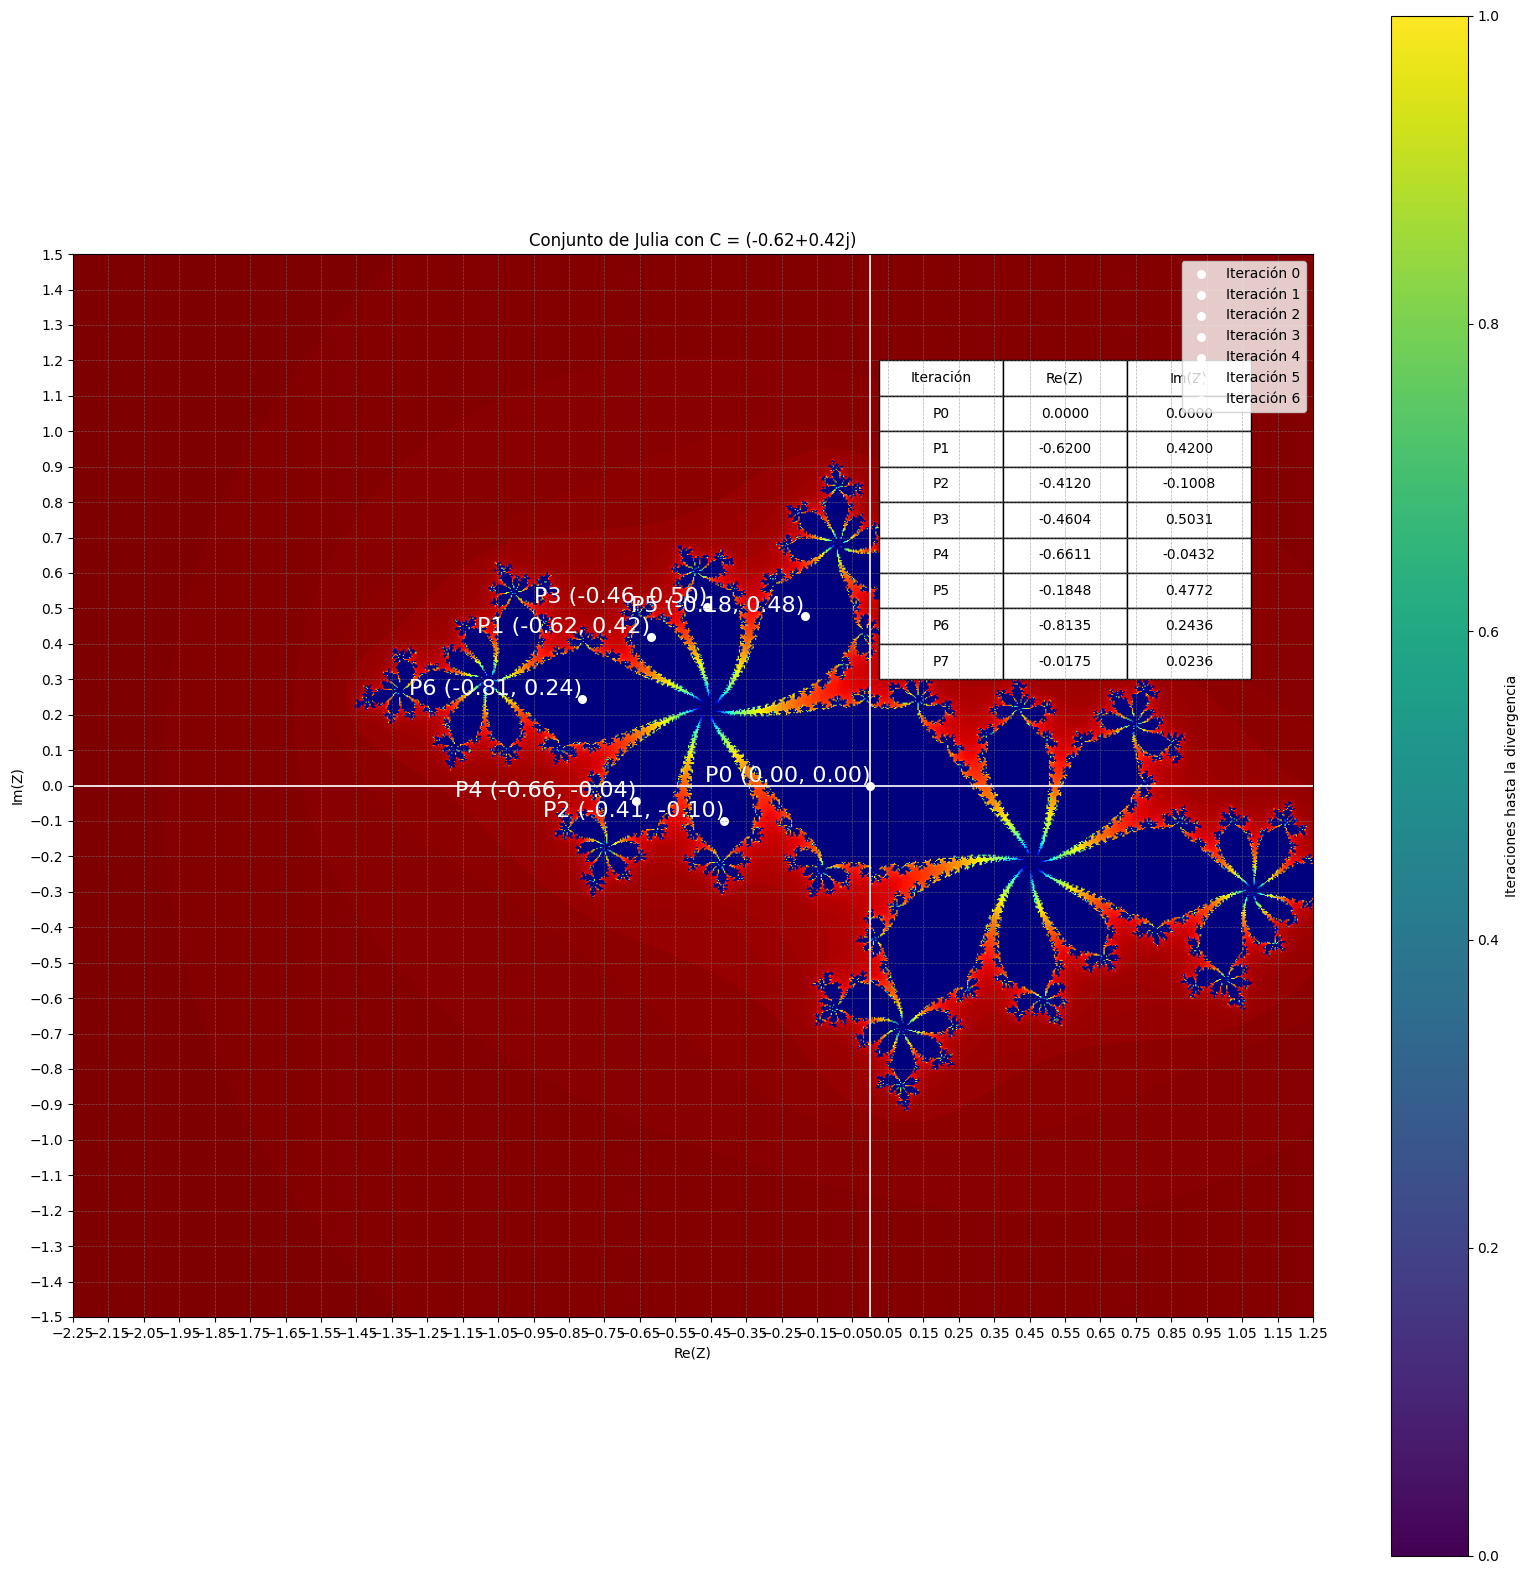

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 1000, 1000
x_min, x_max = -2.25, 1.25
y_min, y_max = -1.5, 1.5
max_iter = 200  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(-0.62, 0.42)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(7):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(20, 20))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='jet_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

**Rango: -1.943<x<1.94 ; -0.01925<y<0.0012**

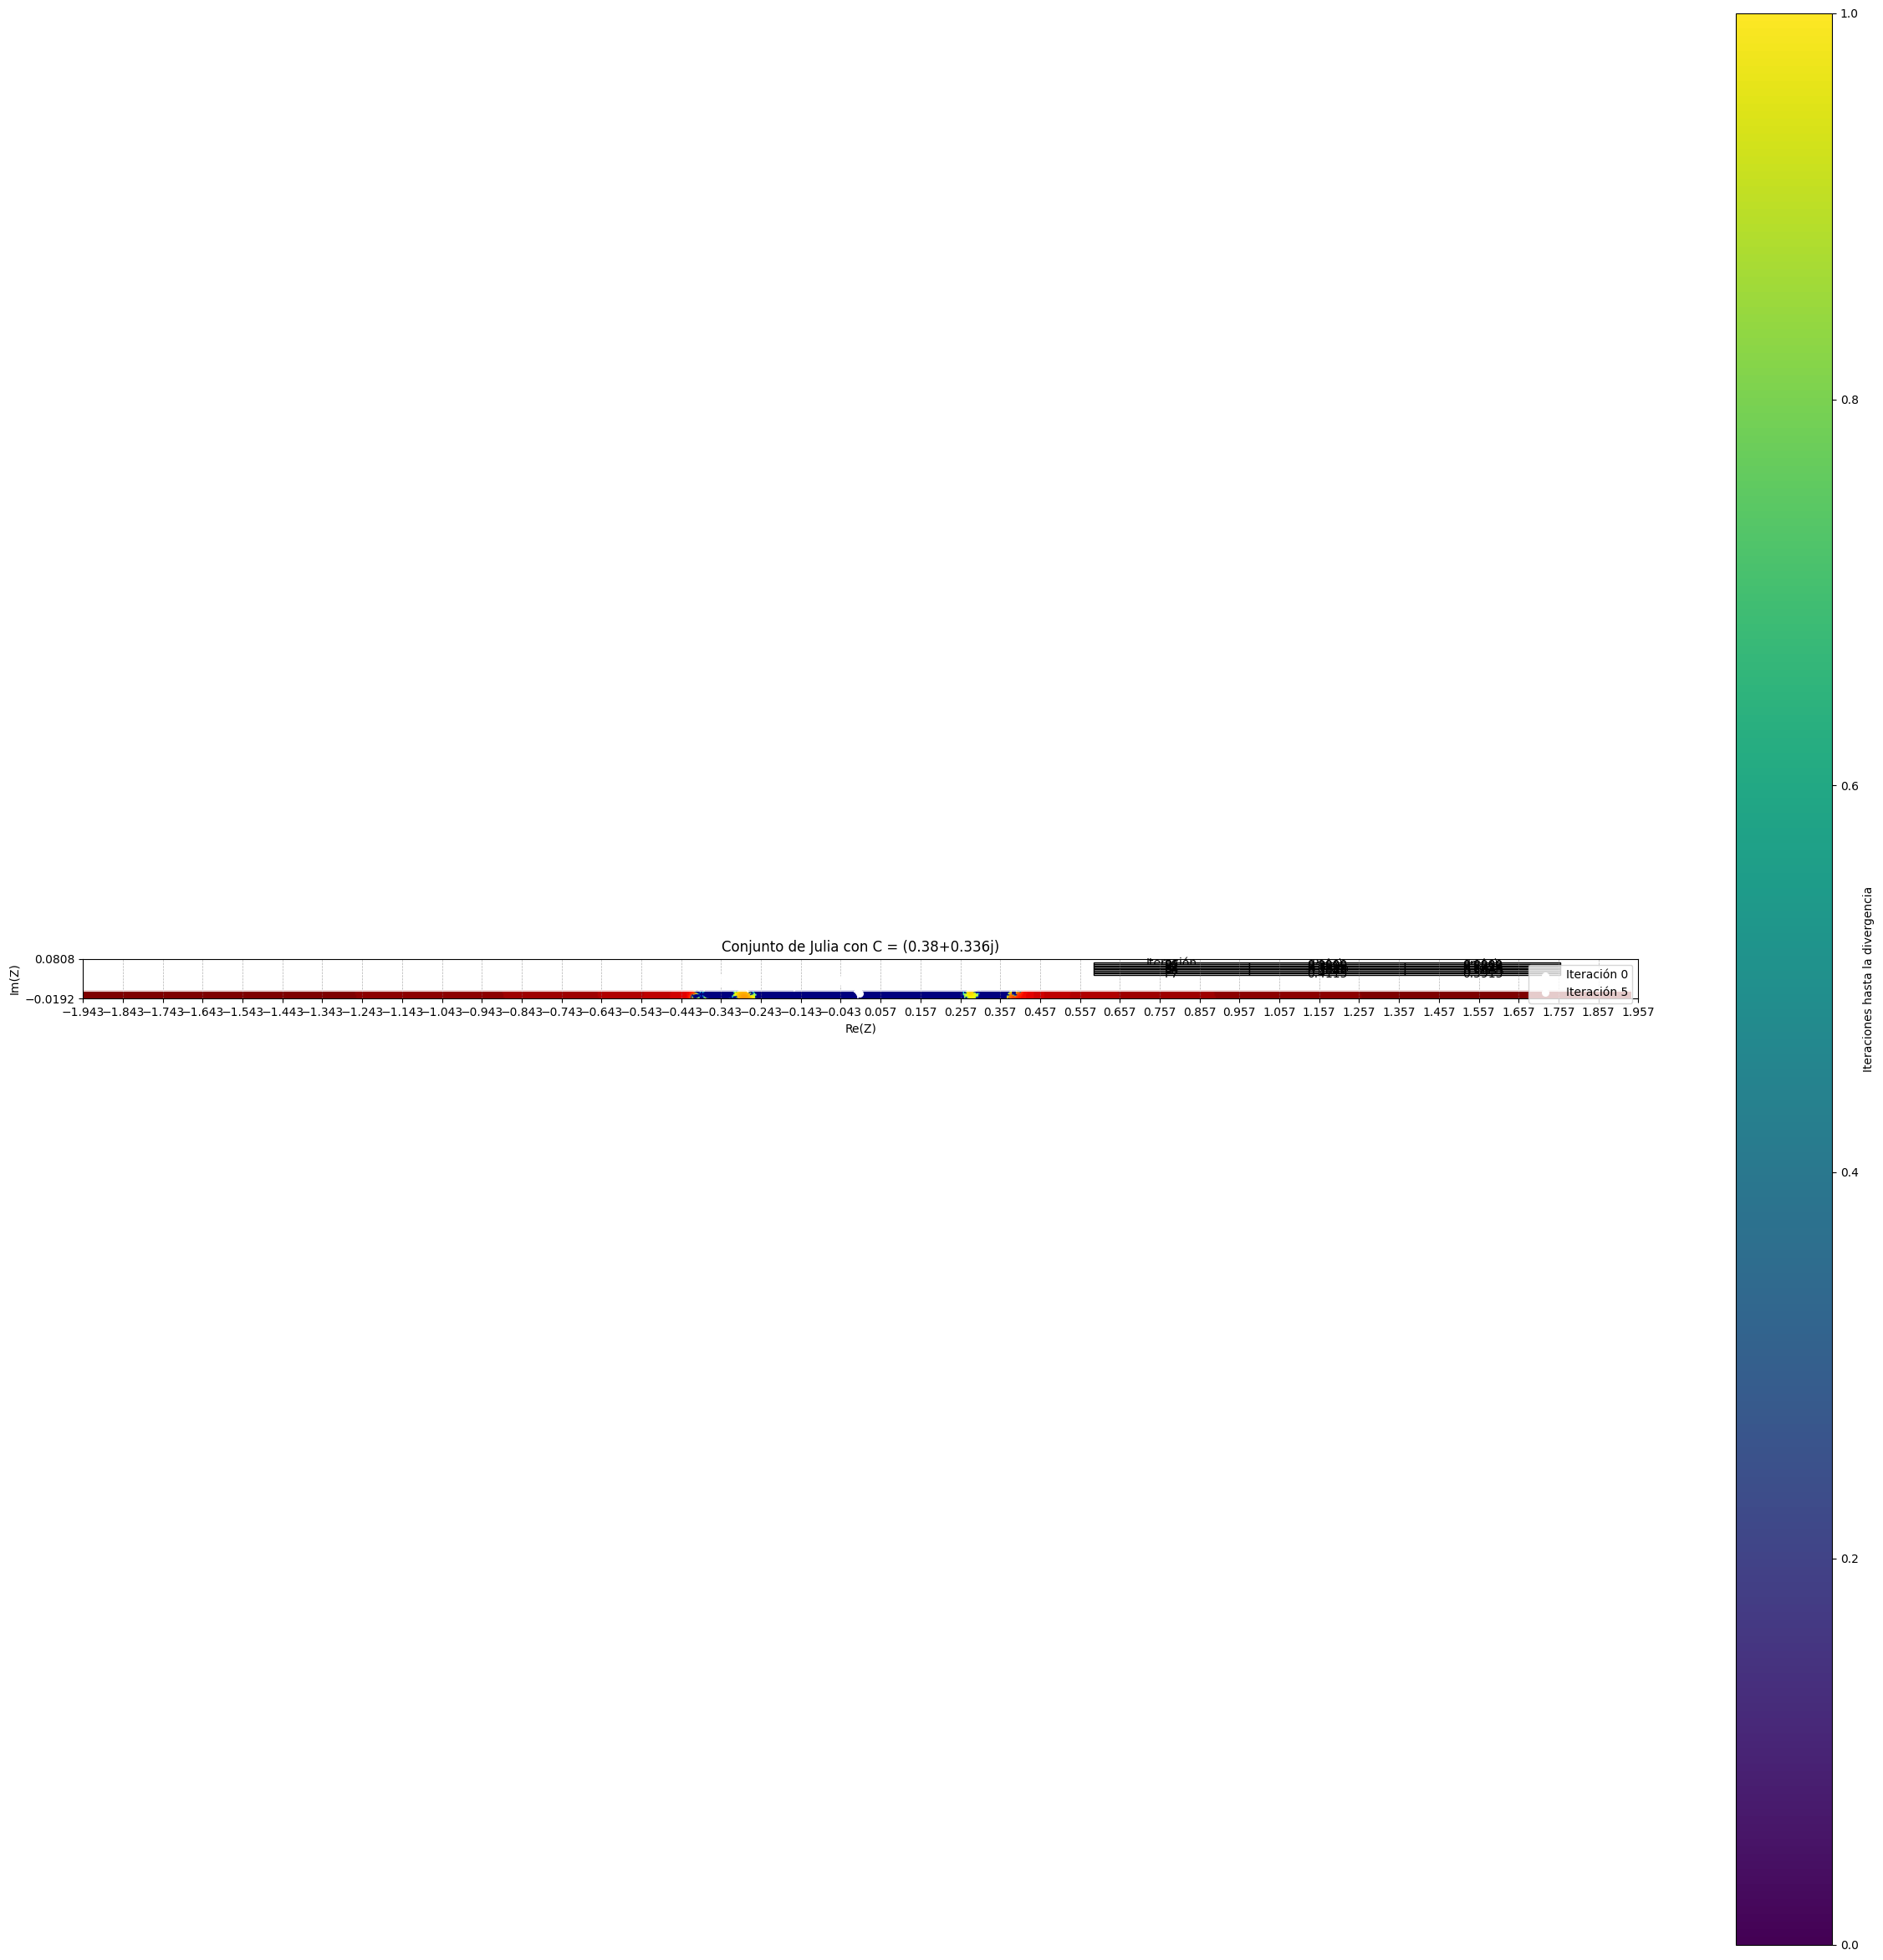

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 1200, 1200
x_min, x_max = -1.943, 1.94
y_min, y_max = -0.01925, 0.0012
max_iter = 70  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(0.38, 0.336)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(7):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(30, 30))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='jet_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

**Rango: -1.764<x<-1.7527 ; -0.01925<y<-0.0109**

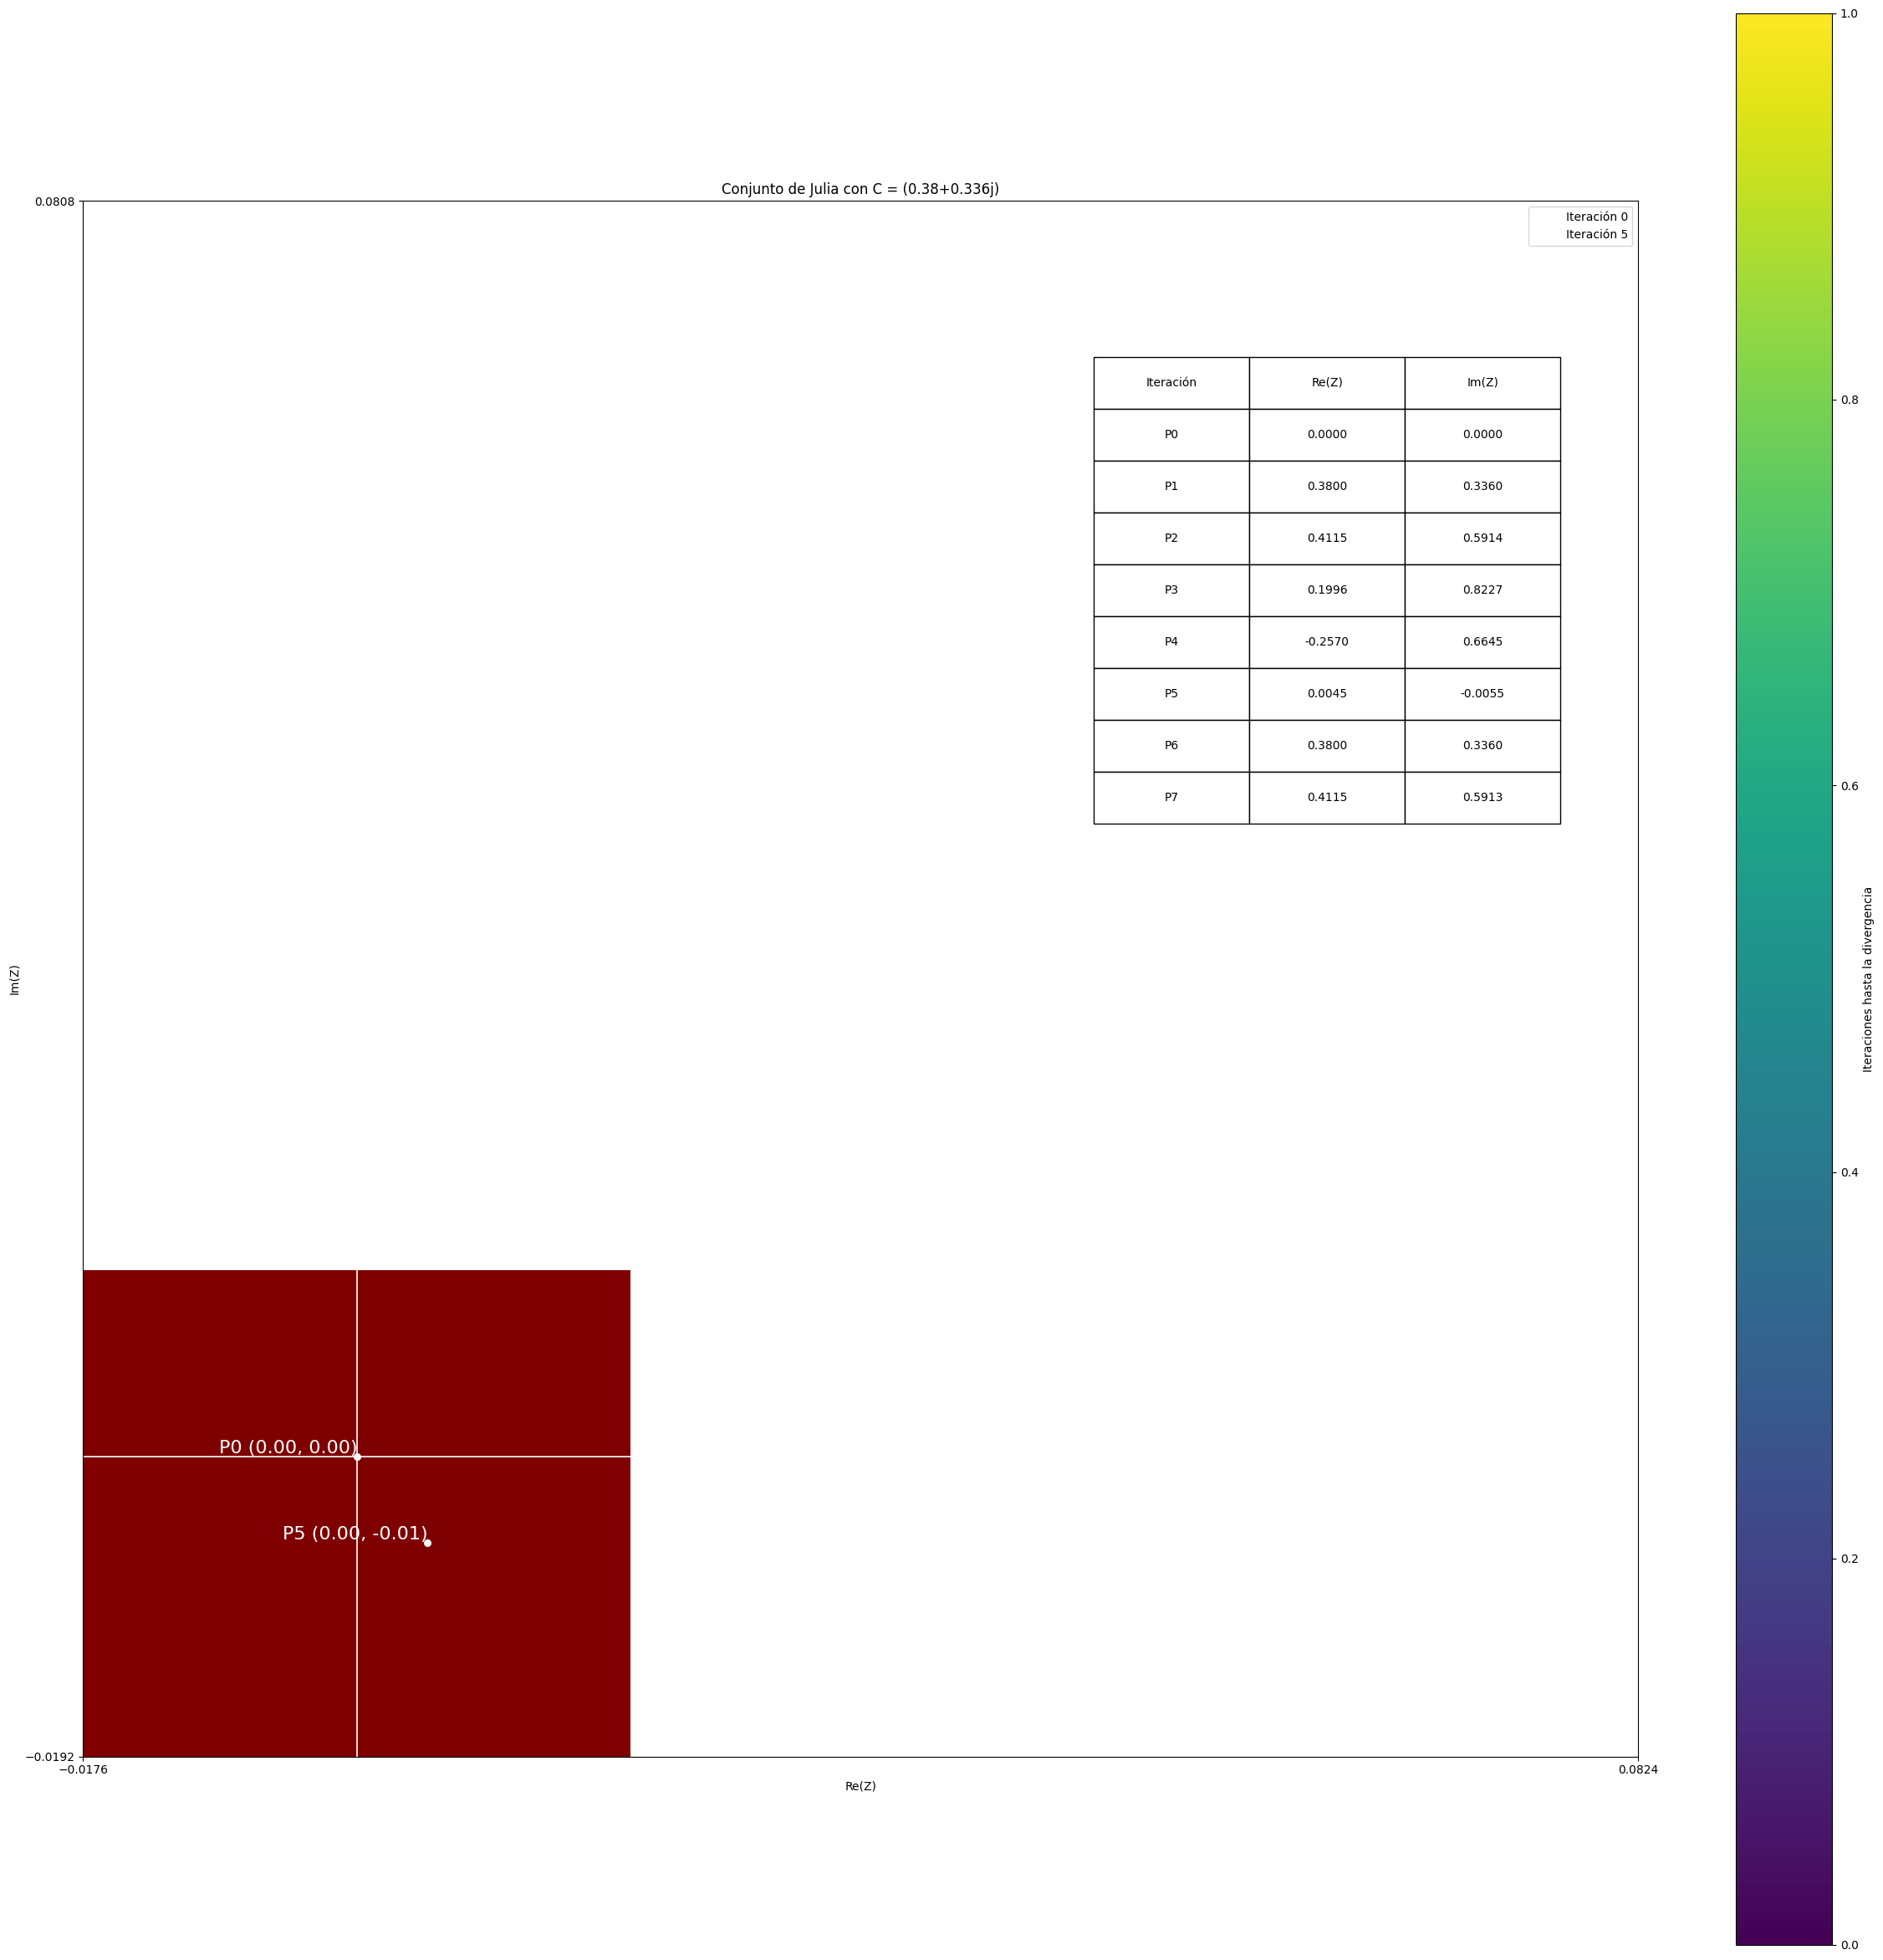

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 1000, 1000
x_min, x_max = -0.01764, 0.017527
y_min, y_max = -0.01925, 0.012
max_iter = 100  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(0.38, 0.336)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(7):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(30, 30))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='jet_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

**Rango: -1.768562608<x<-1.7685626045 ; -0.000790008<y<-0.000790005**

C:\Users\David Andres\AppData\Local\Temp\ipykernel_5076\2547953939.py:60: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


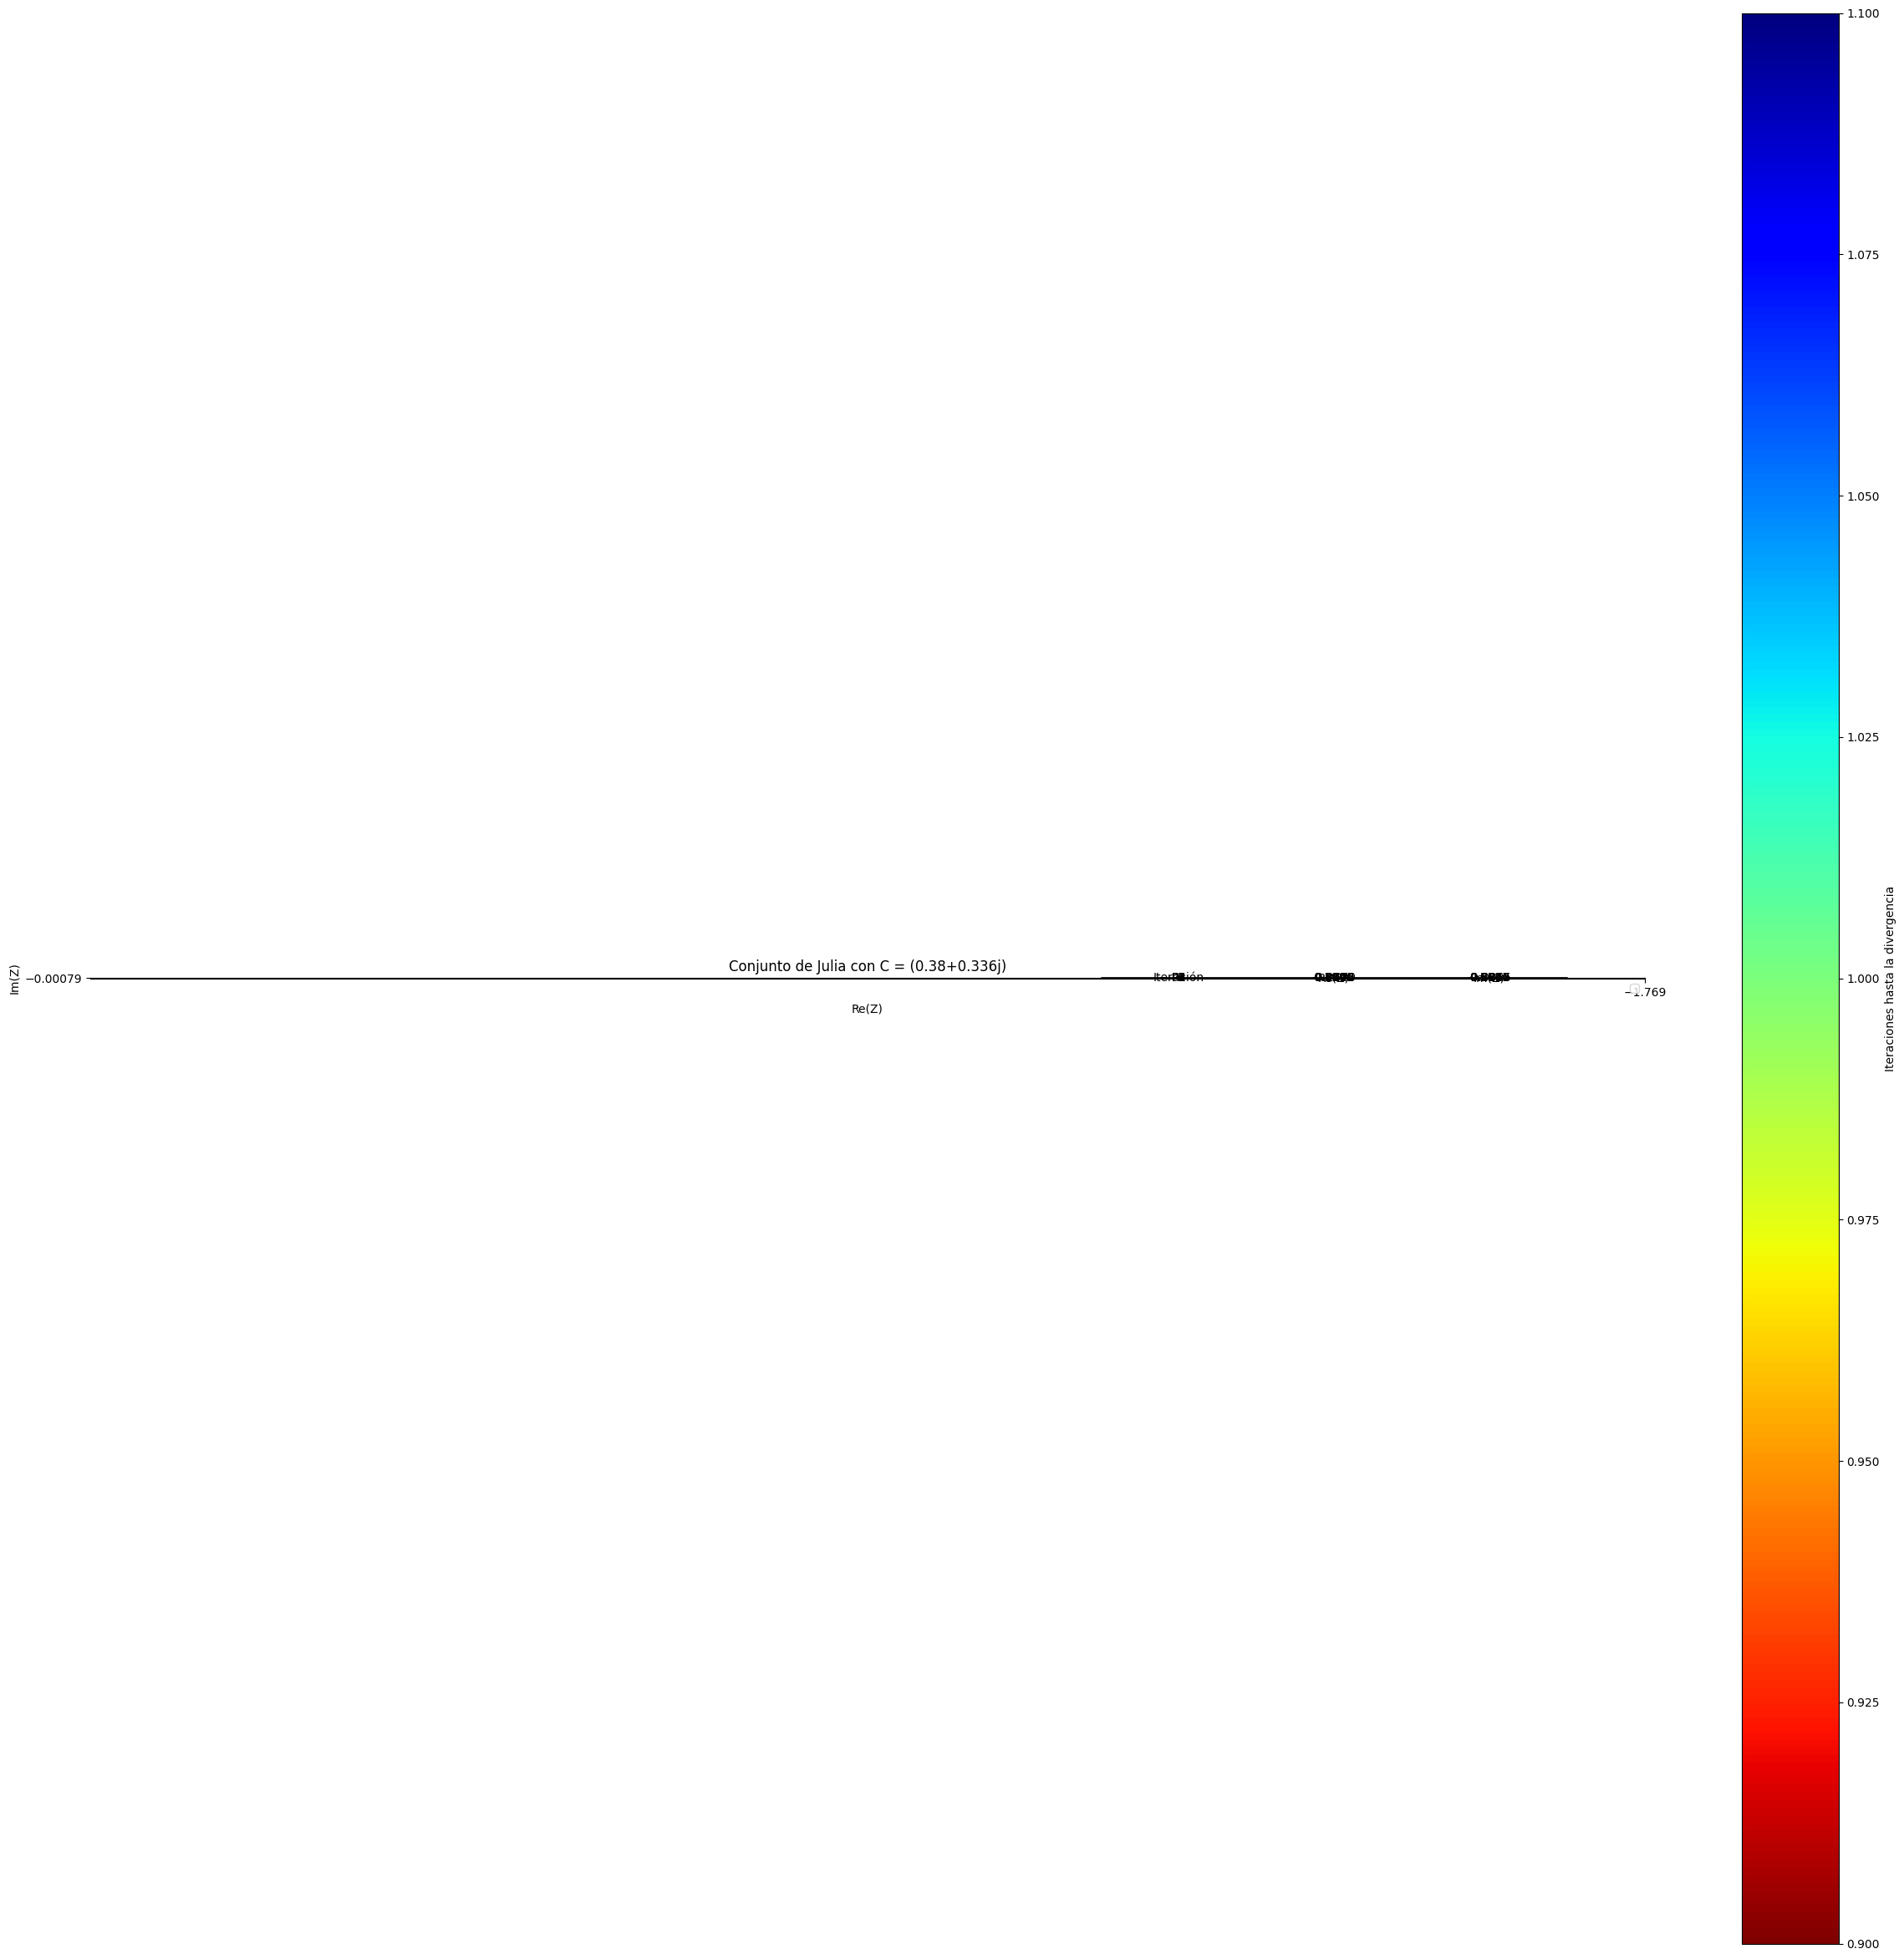

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la imagen
width, height = 800, 800
x_min, x_max = -1.7685626045, -1.7685626088
y_min, y_max = -0.000790005, -0.000790008
max_iter = 90  # Número máximo de iteraciones

# Definir un valor fijo para C
C_fixed = complex(0.38, 0.336)

# Crear la cuadrícula de valores complejos
x_values = np.linspace(x_min, x_max, width)
y_values = np.linspace(y_min, y_max, height)
mandelbrot_set = np.zeros((height, width))

for i, y in enumerate(y_values):
    for j, x in enumerate(x_values):
        Z = complex(x, y)  # Cada punto en la cuadrícula
        C = C_fixed  # Se usa el mismo C en todas las iteraciones
        iter_count = 0
        while abs(Z) <= 2 and iter_count < max_iter:
            Z = Z**2 + C
            iter_count += 1
        mandelbrot_set[i, j] = iter_count

# Calcular las primeras 4 iteraciones de Z_n para C_fixed
C = C_fixed
Z = complex(0, 0)  # Z0
iterations = [(Z.real, Z.imag)]  # Lista para almacenar las coordenadas de las iteraciones
for i in range(7):
    Z = Z**2 + C
    iterations.append((Z.real, Z.imag))

# Graficar el conjunto de Julia
plt.figure(figsize=(30, 30))
plt.imshow(mandelbrot_set, extent=[x_min, x_max, y_min, y_max], cmap='jet_r', origin='lower')

# Agregar las primeras 4 iteraciones como puntos rojos
for i, (x, y) in enumerate(iterations[:-1]):
    if x_min <= x <= x_max and y_min <= y <= y_max:  # Asegurar que esté dentro del área de la imagen
        plt.scatter(x, y, color='white', marker='o', s=30, label=f'Iteración {i}')
        plt.text(x, y, f'P{i} ({x:.2f}, {y:.2f})', fontsize=16, color='white', ha='right', va='bottom')

# Agregar cuadrícula y ejes cartesianos
plt.axhline(0, color='white', linewidth=1.2)  # Eje X
plt.axvline(0, color='white', linewidth=1.2)  # Eje Y
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)  # Cuadrícula

# Establecer marcas en los ejes cada 0.1 unidades
plt.xticks(np.arange(x_min, x_max + 0.1, 0.1))
plt.yticks(np.arange(y_min, y_max + 0.1, 0.1))

# Etiquetas
plt.colorbar(label="Iteraciones hasta la divergencia")
plt.title(f"Conjunto de Julia con C = {C_fixed}")
plt.xlabel("Re(Z)")
plt.ylabel("Im(Z)")
plt.legend()

# Mostrar la gráfica
col_labels = ["Iteración", "Re(Z)", "Im(Z)"]
table_data = [(f'P{i}', f'{x:.4f}', f'{y:.4f}') for i, (x, y) in enumerate(iterations)]
table = plt.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='upper right', bbox=[0.65, 0.6, 0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()